In [346]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
import pandas as pd

In [397]:
def gen_runs(number_of_runs, number_of_reps, function):
    timestamps = []
    for run in range(number_of_runs):
        time = 0
        vector = list(np.random.rand(run))
        for _ in range(number_of_reps):
            start = timer()
            function(vector)
            end = timer()
            time += end - start
        timestamps.append(time / number_of_reps)
    return timestamps

In [230]:
def const_func(vector):
    return 1

In [303]:
def sum_func(vector):
    res = 0
    for i in vector:
        res += i
    return res

In [232]:
def product_func(vector):
    res = 0
    for i in vector:
        res *= i
    return res

In [233]:
def direct_poly_calc(vector):
    x = 1.5
    res = 0
    for index, value in enumerate(vector):
        res += value*x**index
    return res


In [234]:
def horner_poly_calc(vector):
    x = 1.5
    length = len(vector)
    res = 0
    while length > 0:
        length -= 1 
        res = res*x + vector[length]
    return res

In [235]:
def bubble_sort(vector):
    for i in range(0,len(vector)-1): 
        for j in range(len(vector)-1): 
            if(vector[j]>vector[j+1]): 
                temp = vector[j]
                vector[j] = vector[j+1] 
                vector[j+1] = temp 
    return vector

In [236]:
def quick_sort(vector):
    return np.sort(vector, kind='qiucksort')

In [237]:
def timsort(vector):
    return np.sort(vector, kind='stable')

In [625]:
execution_1 = gen_runs(2000, 5, const_func)

In [399]:
execution_2 = gen_runs(2000, 5, sum_func)

In [400]:
execution_3 = gen_runs(2000, 5, product_func)

In [433]:
execution_4_a = gen_runs(1700, 5, direct_poly_calc)

In [428]:
execution_4_b = gen_runs(2000, 5, horner_poly_calc)

C:\Users\Bogdanchik\AppData\Local\Temp\ipykernel_5308\846094891.py:7: RuntimeWarning: overflow encountered in double_scalars
  res = res*x + vector[length]


In [446]:
execution_5 = gen_runs(1000, 5, bubble_sort)

In [416]:
execution_6 = gen_runs(2000, 5, quick_sort)

In [716]:
execution_7 = gen_runs(2000, 5, timsort)

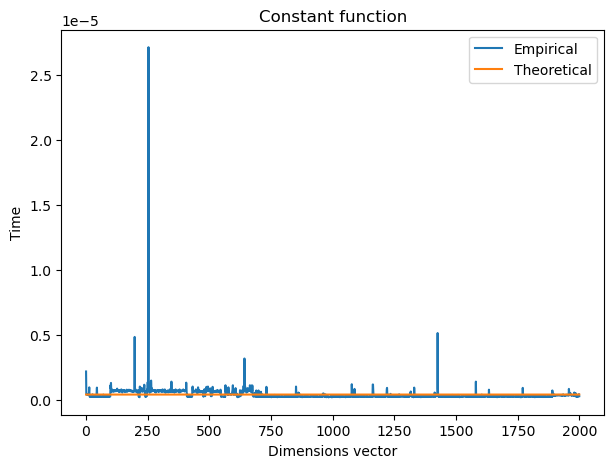

In [628]:
plt.figure(figsize=(7, 5))
plt.plot(execution_1, label='Empirical')
plt.plot(list(range(2000)), np.full((2000), np.mean(execution_1)), label='Theoretical')
plt.legend()
plt.title('Constant function')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')
plt.show()

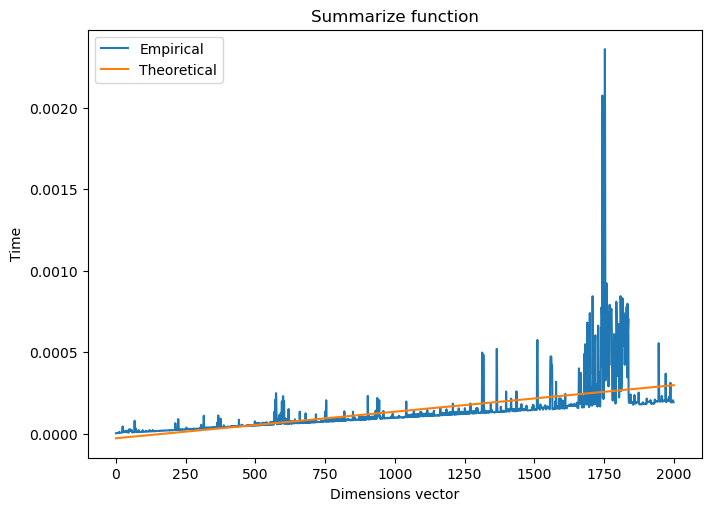

In [706]:
plt.figure(figsize=(7, 5), layout='constrained')
plt.plot(execution_2, label='Empirical')
coeff = np.polyfit(list(range(2000)), execution_2, 1)
x_app = np.linspace(0, 2000, 2000)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.legend()
plt.title('Summarize function')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')
plt.show()

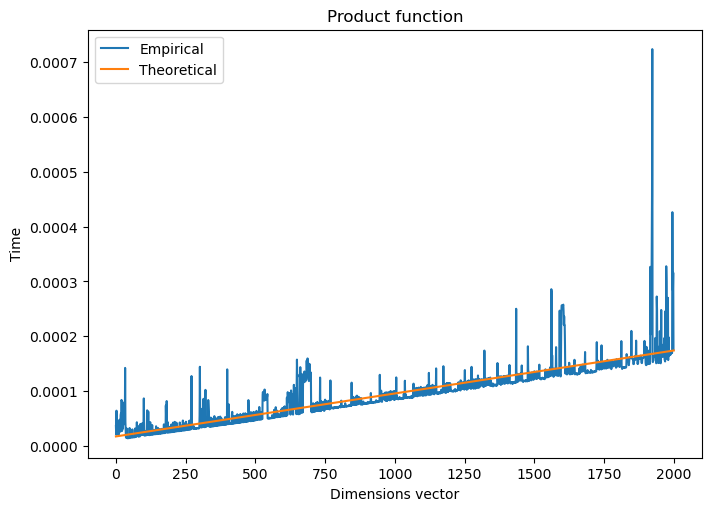

In [704]:
plt.figure(figsize=(7, 5), layout='constrained')
plt.plot(execution_3, label='Empirical')
coeff = np.polyfit(list(range(2000)), execution_3, 1)
x_app = np.linspace(0, 2000, 2000)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.legend()
plt.title('Product function')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')
plt.show()

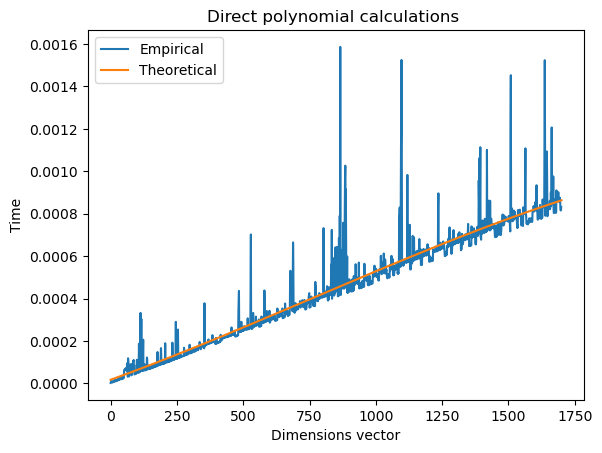

In [702]:
plt.plot(execution_4_a, label='Empirical')
coeff = np.polyfit(list(range(1700)), execution_4_a, 3)
x_app = np.linspace(0, 1700, 1700)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.title('Direct polynomial calculations ')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')
plt.legend()

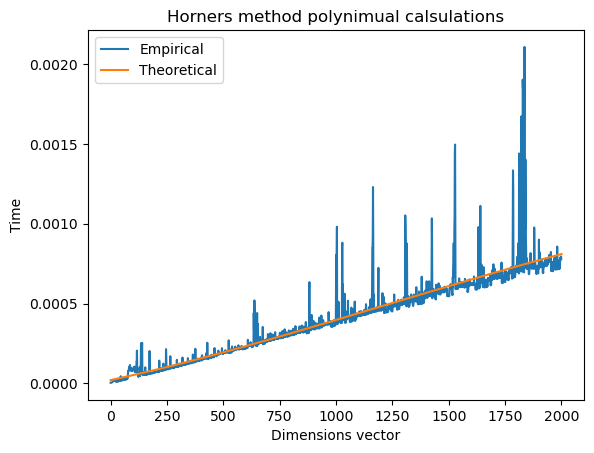

In [698]:
plt.plot(execution_4_b, label='Empirical')
coeff = np.polyfit(list(range(2000)), execution_4_b, 3)
x_app = np.linspace(0, 2000, 2000)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.title('Horners method polynimual calsulations')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')
plt.legend()

Text(0, 0.5, 'Time')

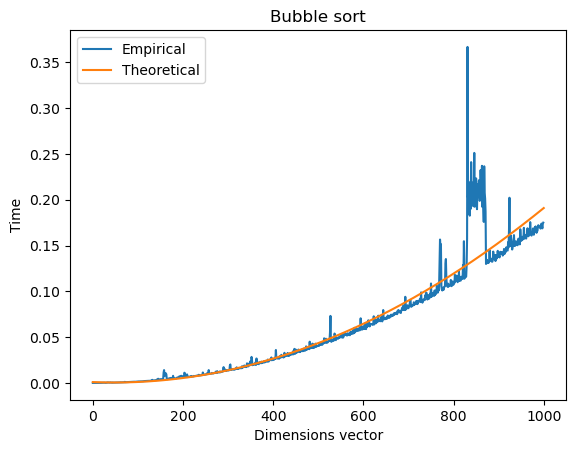

In [709]:
plt.plot(execution_5, label='Empirical')
coeff = np.polyfit(list(range(1000)), execution_5, 2)
x_app = np.linspace(0, 1000, 1000)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.legend()
plt.title('Bubble sort')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')

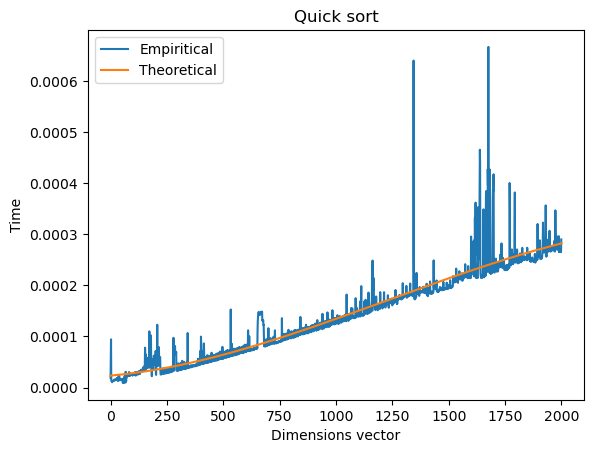

In [694]:
plt.plot(execution_6, label='Empiritical')
coeff = np.polyfit(list(range(2000)), execution_6, 3)
x_app = np.linspace(0, 2000, 2000)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.title('Quick sort')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')
plt.legend()

Text(0, 0.5, 'Time')

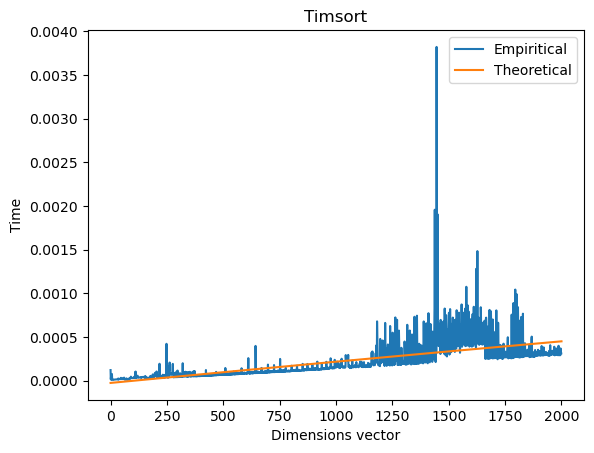

In [722]:
plt.plot(execution_7, label='Empiritical')
coeff = np.polyfit(list(range(2000)), execution_7, 2)
x_app = np.linspace(0, 2000, 2000)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.legend()
plt.title('Timsort')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')

### Part II

In [618]:
def gen_matrix_product():
    timestamps = []
    for i in range(1, 201):
        time = 0
        for _ in range(1, 6):
            A = np.random.rand(i, i)
            B = np.random.rand(i, i)
            start = timer()
            C = np.array([[sum(a*b for a,b in zip(A_row, B_col)) for B_col in zip(*B)] 
        for A_row in A])
            end = timer()
            time += (end - start)
        timestamps.append(time / 5)
    return timestamps

In [619]:
execution_matrix = gen_matrix_product()

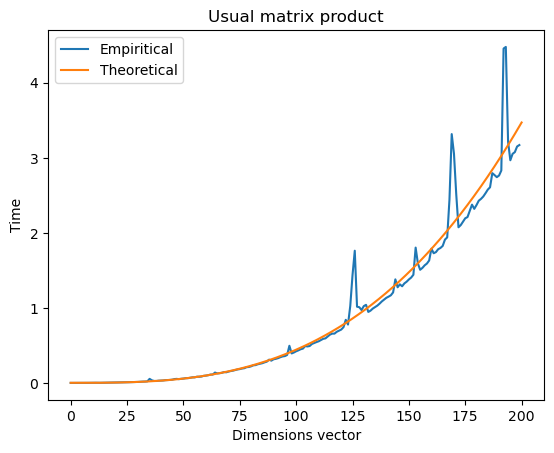

In [710]:
plt.plot(execution_matrix, label='Empiritical')
plt.title('Usual matrix product')
plt.xlabel('Dimensions vector')
plt.ylabel('Time')
coeff = np.polyfit(list(range(200)), execution_matrix, 3)
x_app = np.linspace(0, 200, 200)
y_fit = np.polyval(coeff, x_app)
plt.plot(x_app, y_fit, label='Theoretical')
plt.legend()